# Predicting the rating of a movie using machine learning algorithm.

In this notebook, we're going to go through an example machine learning project with the goal of predicting the rating of a movie.

## 1.Problem definition

 Movie rating prediction based on review using machine learning & deep learning model

## 2.Data

This data set is downloaded from IMDb movie reviews dataset.

Link: https://ieee-dataport.org/open-access/imdb-movie-reviews-dataset

### Primary Target:
Predict rating of one movie’s rating based on data.

### Further Target:
Predict rating of different movies.



## 3.Steps
Step1: download the data and there will be a lot of movie’s csv file where we need to extract review and rating.

Step2: after extracting feature we need to apply world embedding process to create train and test data.
Word embedding process:

* 1.https://www.turing.com/kb/guide-on-word-embeddings-in-nlp
* 2.https://www.geeksforgeeks.org/word-embeddings-in-nlp/
* 3.https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa
* 4.https://machinelearningmastery.com/what-are-word-embeddings/

## 4.Modeling

Design models using machine learning algorithms:

    1. Use ML algorithms like SVM
    2. Use RNN model like LSTM

## 5. Evaluating

## 6. Improving

Imporving machine learning model using:

* `Grid Search CV`

 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/3 Idiots 2009.csv
/kaggle/input/dataset/8 Mile 2002.csv


### Preparing the tools:

We're going to use `pandas` `numpy` `matplotlib` for data manipulation and analysis.

In [2]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline



## Load Data

Load the data from directory

In [3]:
df = pd.read_csv('/kaggle/input/dataset/3 Idiots 2009.csv')

In [4]:
df.head(3)

,username,rating,helpful,total,date,title,review
0,MartinHafer,10,264,313,2 June 2011,Wonderfully entertaining.\n,"It's hard for me to review this film, as I hav..."
1,reedcom,9,350,423,20 November 2011,Wow this American loves this movie\n,I asked my co-workers to recommend a Bollywood...
2,vvv832,10,140,170,19 February 2011,^_^The best film reflecting Asia's education ...,"As many ordinary Chinese high school students,..."


In [5]:
test = df.review[0]
test

'It\'s hard for me to review this film, as I have not seen a huge number of Indian films--probably no more than a couple dozen. Most of the ones I\'ve seen were wonderfully entertaining but I am far from an expert on Bollywood. Because of this, I have a hard time knowing how good this film is relative to other films from this country. So, consider this when you read this review. This may be among the very best India has to offer or it just seems that way to me.<br/><br/>Like so many Indian films, this is a very, very long film--with a run-time of almost three hours. When a movie is bad or just okay, this can seem like forever, but since "3 Idiots" is a very, very good film I loved its length. And, like most films of the genre, it has its share of the usual singing and dancing so foreign to films from other countries. One thing you should know, however, is that defining the type of film it is isn\'t really easy. Much of it is a comedy, but it also has many poignant moments (keep the Kle

## Cleaning up the text 

using python `replace()` function to replce the unnecessary things.

A function to clean a paragraph.

In [6]:
def clean_text(test):
    '''
    Clean's up the unnecessary thiings of a text by replacing them with proper symbols.
    '''
    test = test.replace('<br/>', '')
    test = test.replace('--', ' ')
    test = test.replace("'", '')
    test = test.replace('"','')
    
    return test

In [7]:
test_li = df.review

In [8]:
new_list = test_li.apply(clean_text)

In [9]:
new_list[1]

'I asked my co-workers to recommend a Bollywood movie. I expected Dumb and Dumber by the title. It wasnt that at all. It is more of an inspirational comedy with some serious but good messages. A more accurate title would have been The Legend of Rancho.Odd to me is that they speak in part English, part Hindi through the movie, kinda like some speak Spanglish here I suppose. I know none of the actors but the acting was good, and there was plenty of humor. The characters were believable. Most movie dancing I find a little silly but I even liked the dancing routines in the bathroom.I will be asking my co-workers for more recommendations after this one!'

In [10]:
df.head(2)

,username,rating,helpful,total,date,title,review
0,MartinHafer,10,264,313,2 June 2011,Wonderfully entertaining.\n,"It's hard for me to review this film, as I hav..."
1,reedcom,9,350,423,20 November 2011,Wow this American loves this movie\n,I asked my co-workers to recommend a Bollywood...


In [11]:
df.review = new_list

In [12]:
df.review[1]

'I asked my co-workers to recommend a Bollywood movie. I expected Dumb and Dumber by the title. It wasnt that at all. It is more of an inspirational comedy with some serious but good messages. A more accurate title would have been The Legend of Rancho.Odd to me is that they speak in part English, part Hindi through the movie, kinda like some speak Spanglish here I suppose. I know none of the actors but the acting was good, and there was plenty of humor. The characters were believable. Most movie dancing I find a little silly but I even liked the dancing routines in the bathroom.I will be asking my co-workers for more recommendations after this one!'

In [13]:
df.shape

(600, 7)

In [14]:
df.drop(['date', 'title', 'username'], axis=1, inplace=True)
df.head(2)

,rating,helpful,total,review
0,10,264,313,"Its hard for me to review this film, as I have..."
1,9,350,423,I asked my co-workers to recommend a Bollywood...


<AxesSubplot: title={'center': 'Rating count'}>

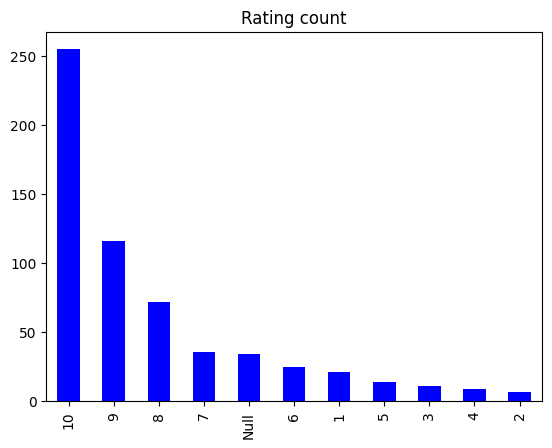

In [15]:
df.rating.value_counts().plot(kind='bar', cmap='winter', title='Rating count')

In [16]:
df.isna().sum()

rating     0
helpful    0
total      0
review     0
dtype: int64

In [17]:
df.describe()

,helpful,total
count,600.000000,600.000000
mean,8.356667,16.280000
std,30.928095,46.398487
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,3.000000
75%,4.250000,11.000000
max,350.000000,423.000000


In [18]:
df.rating.value_counts()

10      255
9       116
8        72
7        36
Null     34
6        25
1        21
5        14
3        11
4         9
2         7
Name: rating, dtype: int64

In [19]:
df.dtypes

rating     object
helpful     int64
total       int64
review     object
dtype: object

## Now change the text to vector using `spaCy`

In [20]:
df.review[1]

'I asked my co-workers to recommend a Bollywood movie. I expected Dumb and Dumber by the title. It wasnt that at all. It is more of an inspirational comedy with some serious but good messages. A more accurate title would have been The Legend of Rancho.Odd to me is that they speak in part English, part Hindi through the movie, kinda like some speak Spanglish here I suppose. I know none of the actors but the acting was good, and there was plenty of humor. The characters were believable. Most movie dancing I find a little silly but I even liked the dancing routines in the bathroom.I will be asking my co-workers for more recommendations after this one!'

In [21]:
import spacy

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
np.random.seed(42)

nlp = spacy.load("en_core_web_sm")

doc = nlp("My girlfriend is Dr. Tareen. She loves to eat burger.")

for sentence in doc.sents:
    print(sentence)

My girlfriend is Dr. Tareen.
She loves to eat burger.


In [23]:
for sentence in doc.sents:
    for word in sentence:
        print(word, end='\n')

My
girlfriend
is
Dr.
Tareen
.
She
loves
to
eat
burger
.


### Write a function to convert the paragraph to sentence.

In [24]:
def to_sentence(para):
    '''
    Converts the given paragraph to sentences.
    '''
    doc = nlp(para)
    for sentence in doc.sents:
        print(sentence)
    

In [25]:
to_sentence(df.review[1])

I asked my co-workers to recommend a Bollywood movie.
I expected Dumb and Dumber by the title.
It wasnt that at all.
It is more of an inspirational comedy with some serious but good messages.
A more accurate title would have been The Legend of Rancho.
Odd to me is that they speak in part English, part Hindi through the movie, kinda like some speak Spanglish here I suppose.
I know none of the actors but the acting was good, and there was plenty of humor.
The characters were believable.
Most movie dancing I find a little silly
but I even liked the dancing routines in the bathroom.
I will be asking my co-workers for more recommendations after this one!
